# Python Exploration - Exercises and Solutions

This notebook contains solutions for exercises for the 2019 DataFest Python Exploration Workshop. <br>

In [67]:
import os
import glob
import pandas as pd
import seaborn as sns
import missingno as msno
from functools import reduce

In [19]:
# If necessary, replace this with the location of the data folder.
data_folder = os.path.join(os.getcwd(),'..', 'data')

In [21]:
# Read in the data directory
file_path_list = glob.glob(os.path.join(data_folder, "*.csv"))
datadict = {os.path.splitext(os.path.basename(file))[0]: pd.read_csv(file)
           for file in file_path_list}


In [23]:
# Do some pre-processing
weather_desc_df = pd.melt(datadict['weather_description'], id_vars = ['datetime'], 
                          var_name='City', value_name='weather_descriptions')

pressure_df = pd.melt(datadict['pressure'], id_vars = ['datetime'], 
                          var_name='City', value_name='pressure')


wind_dir_df = pd.melt(datadict['wind_direction'], id_vars = ['datetime'], 
                          var_name='City', value_name='wind_direction')


wind_sp_df = pd.melt(datadict['wind_speed'], id_vars = ['datetime'], 
                          var_name='City', value_name='wind_speed')


temperature_df = pd.melt(datadict['temperature'], id_vars = ['datetime'], 
                          var_name='City', value_name='temperature')


humidity_df = pd.melt(datadict['humidity'], id_vars = ['datetime'], 
                          var_name='City', value_name='humidity')

print(pressure_df.shape)
print(wind_dir_df.shape)
print(wind_sp_df.shape)
print(temperature_df.shape)
print(humidity_df.shape)

(1629108, 3)
(1629108, 3)
(1629108, 3)
(1629108, 3)
(1629108, 3)


In [24]:
# Merge the data
to_merge = [temperature_df, humidity_df, weather_desc_df]
df_data = reduce(lambda left, right: pd.merge(left, right, on=['datetime', 'City'],
                                             how='outer'), to_merge)
df_data.head()

# Exercise 1
How many datetime observations were taken in Vancouver? <br>

Hint: Use .loc[]

In [33]:
df_van = df_data.loc[df_data['City']=='Vancouver']

In [35]:
df_van.shape

(45253, 5)

# Exercise 2

What was the most common weather description recorded in Vancouver?

Hint: Look up usages for .value_counts().

In [37]:
df_van['weather_descriptions'].value_counts().head()

sky is clear       12805
light rain          5569
overcast clouds     4676
broken clouds       4489
mist                3588
Name: weather_descriptions, dtype: int64

# Exercise 3

What was the mean temperature across all cities with a weather description of "broken clouds"? <br>

Hint: Try using .query(), or the aggregate function .mean().

In [70]:
df_temp = df_data.query('weather_descriptions == "broken clouds"')

In [71]:
df_temp['temperature'].mean()

288.96913576154515

In [ ]:
df_temp = df_data.query('weather_descriptions == "broken clouds"')['temperature'].mean()

# Exercise 4

Calculate the median temperatures in Denver for every year in the dataset. <br>

Hint: Recall how to create a 'Year' column from a datetime column using pd.to_datetime. <br> 
Try to do this calculation for every year simultaneously, rather than year-by-year!


In [ ]:
df_merged_imputed['Year'] = df_merged_imputed['datetime'].dt.year

In [55]:
df_data['datetime'] = pd.to_datetime(df_data['datetime'])
df_data['Year'] = df_data['datetime'].dt.year

In [57]:
df_data.loc[df_data['City'] == 'Denver'].groupby(['Year'], as_index=False)[['temperature']].median()

,Year,temperature
0,2012,279.220000
1,2013,282.150000
2,2014,282.095833
3,2015,282.380333
4,2016,283.680000
5,2017,285.840000


# Exercise 5

For records from the city of Miami, FL, which variable has the most missingness? <br>

Hint: Try isnull()! You can also visualize this using the missingno package.

In [59]:
df_miami = df_data.loc[df_data['City'] == 'Miami']
df_miami.shape


(45253, 6)

In [74]:
df_miami.isnull().sum()

datetime                   0
City                       0
temperature              805
humidity                1087
weather_descriptions     793
Year                       0
dtype: int64

In [64]:
import missingno as msno

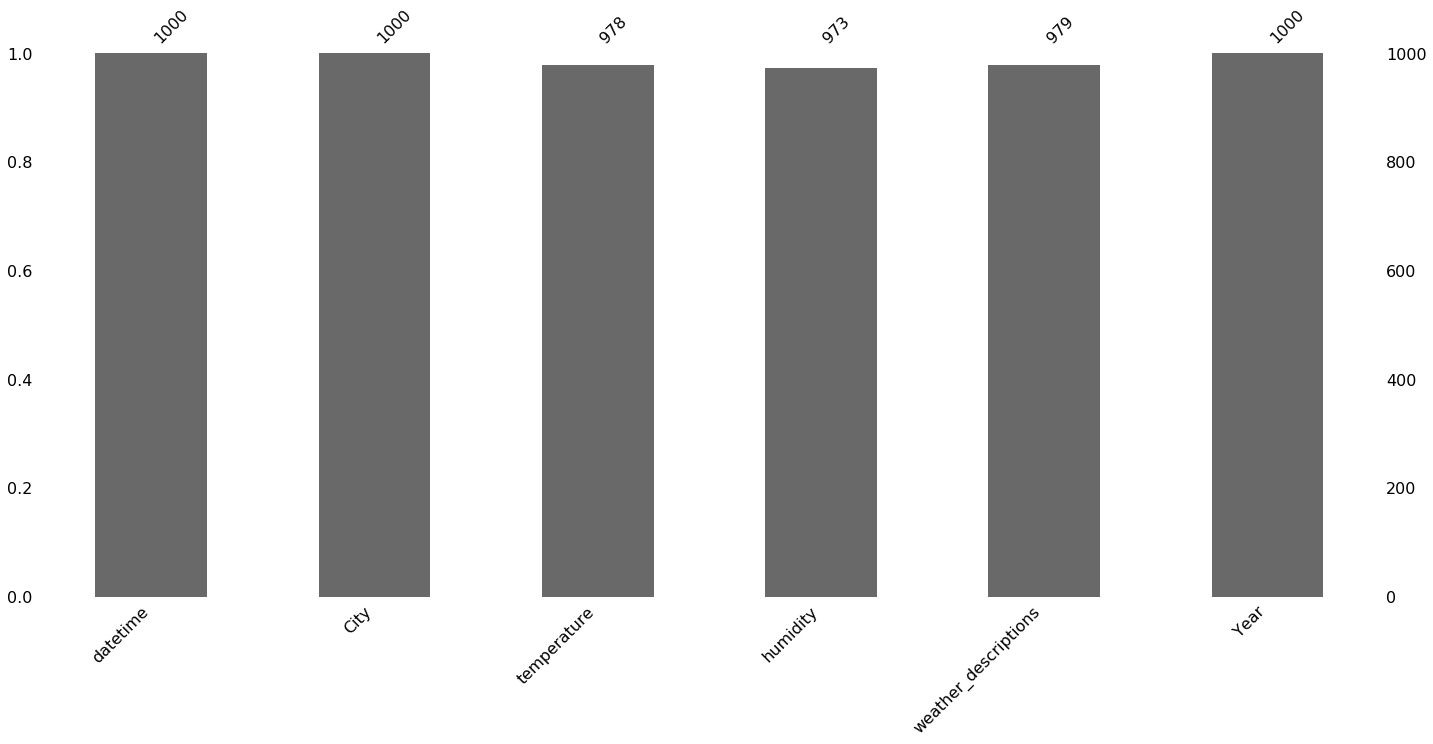

In [65]:
msno.bar(df_miami.sample(1000))

# Exercise 6
For records from the city of Miami, what is the relationship between temperature and humidity? <br>
Does there seem to be a strong relationship? <br>

Hint: Try to plot a pairplot.


/usr/local/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


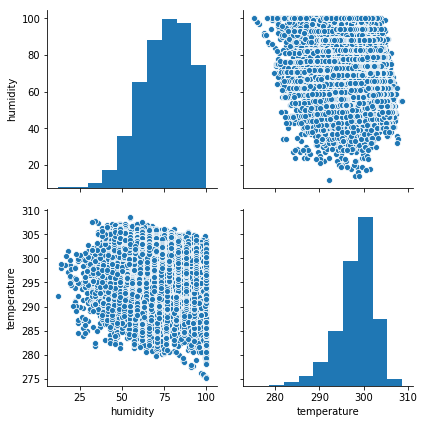

In [68]:
sns.pairplot(df_miami, height=3, vars=["humidity", "temperature"])